# Q1

\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5*\mathcal{B}(\pi; 20, 3) + 0.5*\mathcal{B}(\pi; 3, 20)  & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

This model defines the following:
- The indicator $m$, that denotes if the coin is fake,
- What a fake coin is: a fake coin is one that has an arbitrary probability $\pi_1$ between $0$ and $1$. 
- What a fair coin is: a fair coin has $\pi_1 = 0.5$

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X | \pi_1) p(\pi_1|m)
\end{eqnarray}

###### Not Fake
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X| \pi_1) \delta(\pi_1 - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake
Because of the linearity of integration we can seperately calculate the integrals and multiply by constant and add them up to get marginal likelihood
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(\pi_1; a, b) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \mathcal{B}(\pi; a, b) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+a-1} \pi_1^{c_1+b-1} \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \frac{\Gamma(c_0+a)\Gamma(c_1+b)}{\Gamma(c_0 + c_1 +a + b)}
\end{eqnarray}

\begin{eqnarray}
p1 & = & \int d\pi_1 p(\pi_1; 20, 3) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \mathcal{B}(\pi; 20, 3) \\
& = & \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+20-1} \pi_1^{c_1+3-1} \\
& = & \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \frac{\Gamma(c_0+20)\Gamma(c_1+3)}{\Gamma(c_0 + c_1 +20 + 3)}
\end{eqnarray}

\begin{eqnarray}
p2 & = & \int d\pi_1 p(\pi_1; 3, 20) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \mathcal{B}(\pi; 3, 20) \\
& = & \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+3-1} \pi_1^{c_1+20-1} \\
& = & \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \frac{\Gamma(c_0+3)\Gamma(c_1+20)}{\Gamma(c_0 + c_1 +3 + 20)}
\end{eqnarray}

For the fake coin, marginal likelihood is 

\begin{eqnarray}
p(X| m) & = & 0.5*p1 + 0.5*p2
\end{eqnarray}

The log-odds is the ratio of marginal likelihoods

$$
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
$$

If $l(X)>0$, we may conclude that the coin is fair and biased when $l<0$.

In [23]:
import numpy as np
import scipy.special as sps
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
def fair(c_0, c_1):
    # Total number of tosses
    N = c_0 + c_1

    M_fair = (0.5)**N
    
    return M_fair

In [17]:
def fake(c_0, c_1, a, b):
    
    M_fake = (sps.gamma(a+b) * sps.gamma(c_0 + a) * sps.gamma(c_1 + b)) / (sps.gamma(a) * sps.gamma(b) * sps.gamma(c_0 + c_1 + a + b)) 
   
    return M_fake

In [20]:
def log_odds(c_0, c_1):
    
    odds = fair(c_0, c_1) / (0.5 * fake(c_0,c_1,20,3) + 0.5 * fake(c_0,c_1,3,20))
    
    return np.log(odds)

In [21]:
print log_odds(6,1)

-1.13641225583


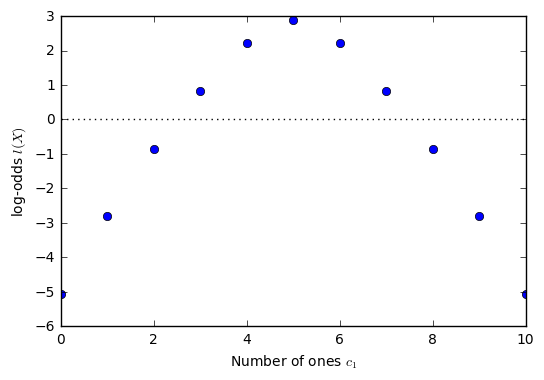

In [24]:
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

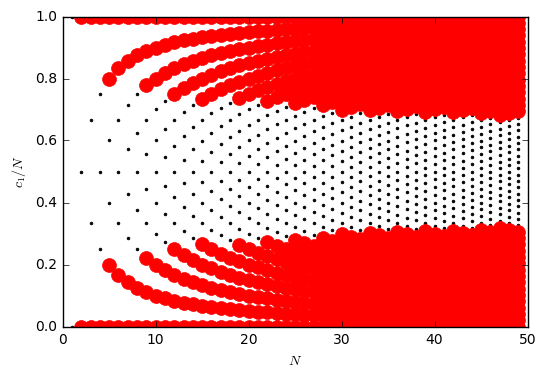

In [46]:
for N in range(1, 50):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c)
        #print l[c]
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,1.01,1.0/N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()